#### Import libraries

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

#### Load MNIST dataset

In [76]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Flatten each image in the dataset such that we have a input matrix X of shape (N, q) where q are the number of features in the image and N is the number of samples (images)

In [77]:
N = len(x_train) # Nr data points
q = len(x_train[0].flatten()) # Nr features
X = []
for i in range(N):
    X.append(x_train[i].flatten())
X = np.reshape(X, (N, q))

#### Use only the first n images

In [78]:
n = 1000
X_stripped = X[:n]
Y_stripped = y_train[:n]
cov = X_stripped.T.dot(X_stripped)

#### The covariance matrix visualized

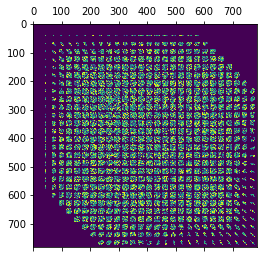

In [79]:
plt.matshow(cov)

#### Calculate the eigenvalues and eigenvectors of the covariance matrix

In [89]:
eigenValues, eigenVectors = np.linalg.eig(cov)

#### Sort the eigenvectors according to the largest eigenvalue

In [90]:
sortedEigenVectors = eigenVectors[eigenValues.argsort()]
sortedEigenValues = eigenValues[eigenValues.argsort()]

#### Calculate the latent space of X (denoted L) by calculating: XP, where P is the matrix of the sorted eigenvectors

In [91]:
L = X_stripped.dot(sortedEigenVectors) # Latent space

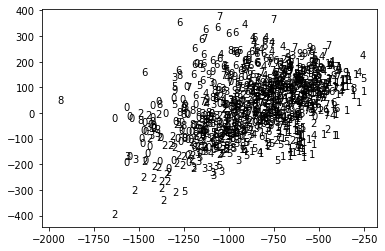

In [92]:
x, y = L[:, :2].T
plt.plot(x, y, '.', markersize=0)
for i, tup in enumerate(zip(x, y)):
    xs, ys = tup
    plt.text(xs, ys, str(Y_stripped[i]), color="black")
plt.show()

#### We can clearly see here that the first two principal components describe the data quite well in two dimensions.